In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import keras
import matplotlib.pyplot as plt

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Import custom functions from other notebooks
sys.path.append("myfun/")
from ipynb.fs.full.myfun_nn import *
from ipynb.fs.full.myfun_model_nn import *

2024-01-18 21:48:54.286366: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-18 21:48:54.286394: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-18 21:48:54.287178: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-18 21:48:54.293055: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-18 21:48:55.072416: W tensorflow/compiler/tf2

# Data and functions

In [2]:
## Params
N = 200
T = 0.5
trange = 0, 0.245, T

In [3]:
rho_l = 0.4
rho_r = 0.8

# initial condition
def rho_bar(x):
    result = 0
    if(x >= -1 and x <= 0):
        result = rho_l
    if(x > 0 and x < 1):
        result = rho_r
    return result

In [4]:
# flux
def f(z):
    return z*(1-z)

def fprime(z):
    return 1-2*z

def fprime_inv(z):
    return .5*(1-z)

In [5]:
# speed of shock
s = (f(rho_r) - f(rho_l))/(rho_r - rho_l)

# shock
def gamma(t):
    return s*t

# Lax-Entropy condition
if fprime(rho_l) < s or fprime(rho_r) > s:
    print("Lax-Entropy condition not satisfied")

In [6]:
s, (f(rho_r),f(rho_l)), (fprime(rho_l), fprime(rho_r))

(-0.20000000000000004,
 (0.15999999999999998, 0.24),
 (0.19999999999999996, -0.6000000000000001))

In [7]:
# # solution
# def rho(x,t):
#     result = 0
#     if(x <= gamma(t)):
#         result = rho_l
#     if(x > gamma(t)):
#         result = rho_r
#     return result

# solution (rarefaction wave)
def rho(x,t):
    result = 0
    if(x <= fprime(rho_l)*t):
        result = rho_l
    if(x > fprime(rho_l)*t and x <= fprime(rho_r)*t):
        result = fprime_inv(x/t)
    if(x > fprime(rho_r)*t):
        result = rho_r
    return result

def ispositive(n):
    result = True
    if n < 0:
        result = False
    return result

def characteristic(xspan,tspan):
    
    result = []
    
    for x0 in xspan:
        
        tmp = x0
        char = [x0]
        shock = [gamma(tspan[0])]
        nocross_cond = True
        
        for t in tspan[1:]:
            
            shock.append(gamma(t))
            cond = (tmp <= shock[-1])
            
            if cond:
                tmp = x0 + rho_l*t
            else:
                tmp = x0 + rho_r*t

            if nocross_cond:
                val = (tmp-shock[-1])/(char[-1]-shock[-2])  
                nocross_cond = ispositive(val)
            else:
                #print("nocross_cond is False now")
                tmp = gamma(t)

            char.append(tmp)
            
        result.append(char)

    return result

# Simulation

In [8]:
xspan = np.linspace(-1,1,10)
tspan = np.linspace(0,T,160)
chars = characteristic(xspan,tspan)
len(chars[0]), len(tspan)

(160, 160)

In [9]:
np.round(tspan,3)

array([0.   , 0.003, 0.006, 0.009, 0.013, 0.016, 0.019, 0.022, 0.025,
       0.028, 0.031, 0.035, 0.038, 0.041, 0.044, 0.047, 0.05 , 0.053,
       0.057, 0.06 , 0.063, 0.066, 0.069, 0.072, 0.075, 0.079, 0.082,
       0.085, 0.088, 0.091, 0.094, 0.097, 0.101, 0.104, 0.107, 0.11 ,
       0.113, 0.116, 0.119, 0.123, 0.126, 0.129, 0.132, 0.135, 0.138,
       0.142, 0.145, 0.148, 0.151, 0.154, 0.157, 0.16 , 0.164, 0.167,
       0.17 , 0.173, 0.176, 0.179, 0.182, 0.186, 0.189, 0.192, 0.195,
       0.198, 0.201, 0.204, 0.208, 0.211, 0.214, 0.217, 0.22 , 0.223,
       0.226, 0.23 , 0.233, 0.236, 0.239, 0.242, 0.245, 0.248, 0.252,
       0.255, 0.258, 0.261, 0.264, 0.267, 0.27 , 0.274, 0.277, 0.28 ,
       0.283, 0.286, 0.289, 0.292, 0.296, 0.299, 0.302, 0.305, 0.308,
       0.311, 0.314, 0.318, 0.321, 0.324, 0.327, 0.33 , 0.333, 0.336,
       0.34 , 0.343, 0.346, 0.349, 0.352, 0.355, 0.358, 0.362, 0.365,
       0.368, 0.371, 0.374, 0.377, 0.381, 0.384, 0.387, 0.39 , 0.393,
       0.396, 0.399,

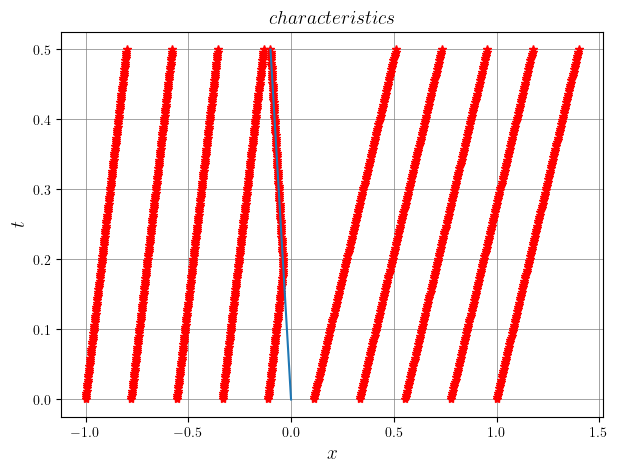

In [26]:
# Initialize the fig
nrow, ncol = 1, 1
width, height = 7, 5 # single subplot
fig, ax = plt.subplots(nrow,ncol,figsize=(width,height))

for ch in chars:
    ax.plot(ch,tspan, c='red', ls='-', lw = 0.5, marker = '*')

ax.plot(gamma(tspan),tspan)

# labeling     
ax.set_xlabel(r"$x$",fontsize=14)
ax.set_ylabel(r"$t$",fontsize=14)
ax.set_title(fr"$characteristics$",fontsize=14)
ax.grid(color='grey', linestyle='-', linewidth=0.5)
    
plt.show()

In [11]:
yrange = []

for x in xspan:
    y = []
    for t in trange:
        y.append(rho(x,t))
    yrange.append(y)

In [12]:
tspan_rounded = list(np.round(tspan,3))

idx = [tspan_rounded.index(t) for t in trange]
charrange = [[ch[i] for i in idx] for ch in chars]

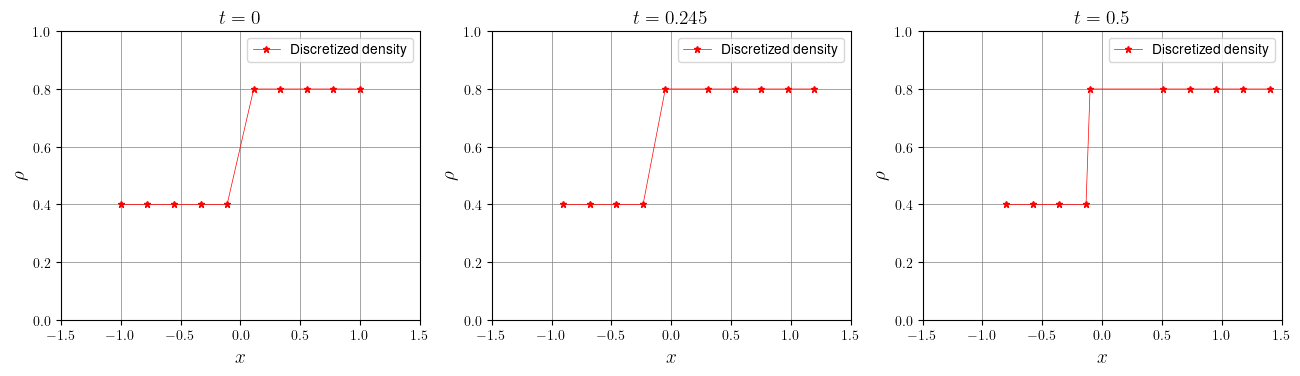

In [13]:
# Initialize the fig
nrow, ncol = 1, 3
width, height = 7, 5 # single subplot
fig, axes = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

for step, (ax, t) in enumerate(zip(axes.ravel(), trange)):
    char, y = [c[step] for c in charrange], [y[step] for y in yrange]
    ax.plot(char,y,c='red', ls='-', lw = 0.5, ms=5, marker='*', label="Discretized density")
    #     ax.plot(char,y*0,c='blue', ls='', ms=5, marker='o', label="Particles")

    ax.set_xlim([-1.5,1.5])
    ax.set_ylim([0, 1])

    # labeling     
    ax.set_xlabel(r"$x$",fontsize=14)
    ax.set_ylabel(r"$\rho$",fontsize=14)
    ax.set_title(fr"$t={t}$",fontsize=14)

    ax.grid(color='grey', linestyle='-', linewidth=0.5)
    ax.legend()
    
plt.show()

## Particle system

### Load the model

In [14]:
# Load the model
dir_nn2 = "2023-12-09_21-54-43_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn2"
dir_nn4 = "2023-12-10_01-23-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn4"
dir_nn10 = "2023-12-10_11-38-47_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10"

In [15]:
dir_nn = dir_nn4
namefile_nn = "/info_nn4.txt"
namefile_model_nn = "/model_nn4.keras"

In [16]:
path = "./out/" + dir_nn

# Construct a list for header
with open(path + namefile_nn) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [17]:
info_nn = pd.read_csv(path + namefile_nn, sep=',', usecols= header)
model_nn = keras.models.load_model(path + namefile_model_nn)

In [18]:
get_stats(model_nn)


-------------------- Model Summary --------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 4)                 8         
                                                                 
 Output-Layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  Hidden-Layer-1
  --Kernels (Weights): 
[[ -3.145145 -16.729847  -4.197045 -19.921196]]
  --Biases: 
[-5.1443706  2.4443479 -5.799361  -4.076138 ]

Layer:  Output-Layer
  --Kernels (Weights): 
[[ -0.63176554]
 [  6.577913  ]
 [ -3.6126242 ]
 [-21.061737  ]]
  -- No biases




### Params

In [19]:
# Intial positions and consecutive distances of N vehicles
x1 = np.linspace(-1, 0, int(N/3)+1, endpoint=False)
x2 = np.linspace(0, 1, int(2*N/3), endpoint=False)
X = x1.tolist() + x2.tolist()

cons_dis = np.diff(X, axis=0)

In [21]:
# First N-1 vehicle velocity
y_pred = model_nn(cons_dis, training=False)

# Approximate the velocity of the leading car ?
v0 = info_nn['v0'].mean()

# check
if all(i >= v0 for i in y_pred):
    print("There is at least a vehicle faster than the leading car")

In [22]:
# Solve the ODE system in this time interval
x0 = X
v_ann = np.append(y_pred.numpy().flatten().tolist(), v0).tolist()
tspan_ann, sol_ann = odesolver_ann(x0, v_ann, 0, T, deltat=0.005)

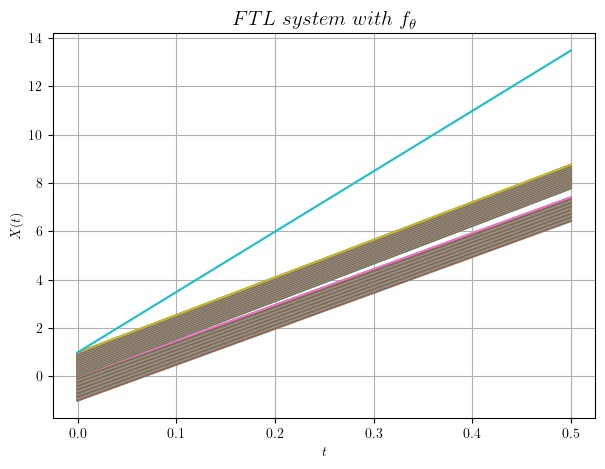

In [30]:
# Create a figure and axis for the plot
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width, height))

# Plot the true and simulated trajectories for each vehicle
for veh in range(0, N):
    ax.plot(tspan_ann, sol_ann[veh])

ax.set_xlabel("$t$")
ax.set_ylabel("$X(t)$")
ax.set_title(fr"$FTL\ system\ with\ f_\theta$", fontsize=15)

plt.grid()
plt.show()

### Discretized density

In [24]:
# Discretized density

ln = 1/N
pn = ln/np.diff(sol_ann, axis=0)
idx = 0, list(tspan_ann).index(0.245), -1

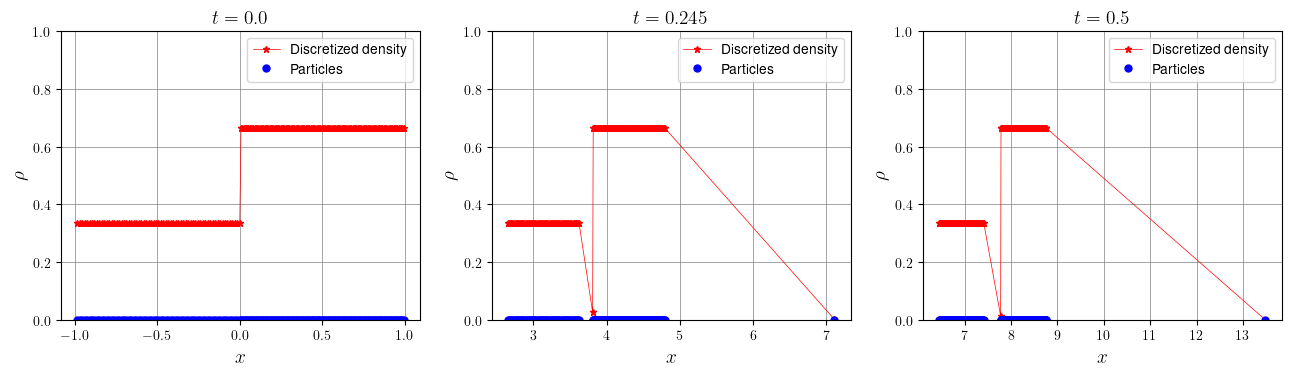

In [25]:
# Initialize the fig
nrow, ncol = 1, 3
width, height = 7, 5 # single subplot
fig, axes = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

for ax, i in zip(axes.ravel(), idx):

    t = tspan_ann[i]
    x = sol_ann[:,i][1:]
    ax.plot(x,pn[:,i],c='red', ls='-', lw = 0.5, ms=5, marker='*', label="Discretized density")
    ax.plot(x,x*0,c='blue', ls='', ms=5, marker='o', label="Particles")

#     ax.set_xlim([-1.5,1.5])
    ax.set_ylim([0, 1])

    # labeling     
    ax.set_xlabel(r"$x$",fontsize=14)
    ax.set_ylabel(r"$\rho$",fontsize=14)
    ax.set_title(fr"$t={t}$",fontsize=14)

    ax.grid(color='grey', linestyle='-', linewidth=0.5)
    ax.legend()
    
plt.show()